<a href="https://colab.research.google.com/github/Agarwalapurva/IBI-BHARAT-INTERN/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install datasets seaborn plotly nltk spacy scikit-learn

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
df = pd.read_csv('Amazon_Reviews.csv', engine='python', sep=',')

In [5]:
print(df.head(), df.shape)

      Reviewer Name                     Profile Link Country Review Count  \
0        Eugene ath  /users/66e8185ff1598352d6b3701a      US     1 review   
1  Daniel ohalloran  /users/5d75e460200c1f6a6373648c      GB    9 reviews   
2          p fisher  /users/546cfcf1000064000197b88f      GB   90 reviews   
3         Greg Dunn  /users/62c35cdbacc0ea0012ccaffa      AU    5 reviews   
4     Sheila Hannah  /users/5ddbe429478d88251550610e      GB    8 reviews   

                Review Date                  Rating  \
0  2024-09-16T13:44:26.000Z  Rated 1 out of 5 stars   
1  2024-09-16T18:26:46.000Z  Rated 1 out of 5 stars   
2  2024-09-16T21:47:39.000Z  Rated 1 out of 5 stars   
3  2024-09-17T07:15:49.000Z  Rated 1 out of 5 stars   
4  2024-09-16T18:37:17.000Z  Rated 1 out of 5 stars   

                                      Review Title  \
0       A Store That Doesn't Want to Sell Anything   
1           Had multiple orders one turned up and…   
2                      I informed these repr

In [6]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import spacy
from nltk.corpus import stopwords

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

# Define cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters/numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]#better than stemming
    return ' '.join(tokens)

df['clean_text'] = df['Review Text'].apply(clean_text)
df[['Review Text', 'clean_text']].head()

,Review Text,clean_text
0,"I registered on the website, tried to order a ...",registered website tried order laptop entered ...
1,Had multiple orders one turned up and driver h...,multiple order one turned driver phone door nu...
2,I informed these reprobates that I WOULD NOT B...,informed reprobate would going visit sick rela...
3,I have bought from Amazon before and no proble...,bought amazon problem happy service price amaz...
4,If I could give a lower rate I would! I cancel...,could give lower rate would cancelled amazon p...


In [7]:
# Use the lemmatized clean text
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['clean_text'])

#View TF-IDF matrix
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaggghhh,aaaaahhhh,aaaggghhhh,aactually,aadhar,aain,aaj,...,zoverstocks,zoyam,zro,zu,zuck,zuckerberg,zum,zumimal,zumimall,zumzee
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.2 MB/s eta 0:00:00


In [9]:
from sentence_transformers import SentenceTransformer

# Ensure 'Rating' column is renamed to 'rating' and handle potential NaNs
if 'Rating' in df.columns:
    df = df.rename(columns={'Rating': 'rating'})
df = df.dropna(subset=['rating']) # Drop rows where rating is missing after renaming

# Map star ratings to sentiment labels
def to_sentiment(rating):
    # Extract the numerical rating from the string
    try:
        numeric_rating = int(rating.split(' ')[1])
    except (ValueError, IndexError):
        return None # Handle cases where rating format is unexpected

    if numeric_rating <= 2:
        return "negative"
    elif numeric_rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['rating'].apply(to_sentiment)
df[['clean_text', 'sentiment']].head()

# Load pre-trained SentenceTransformer model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and efficient

# Encode the lemmatized text (this may take 1–3 minutes)
embeddings = bert_model.encode(df['clean_text'].tolist(), show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/658 [00:00<?, ?it/s]

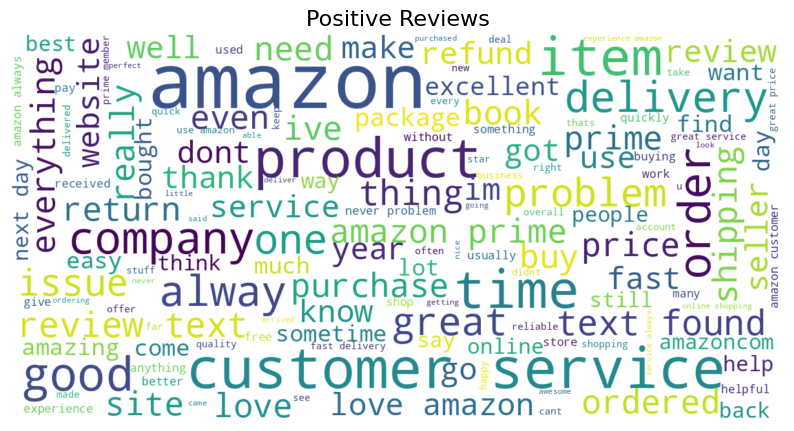

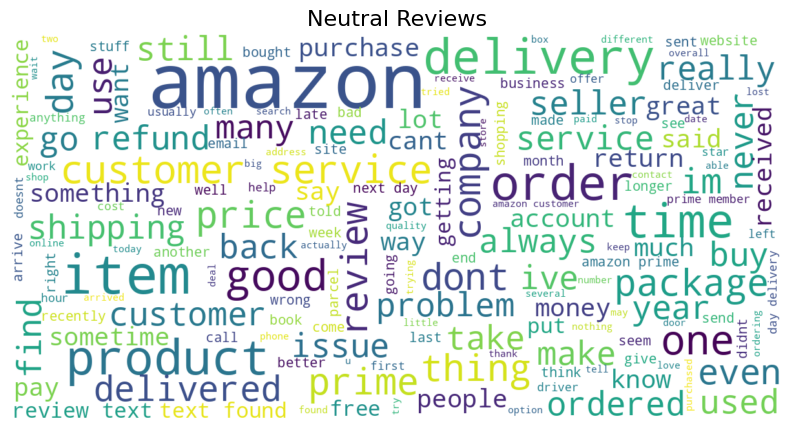

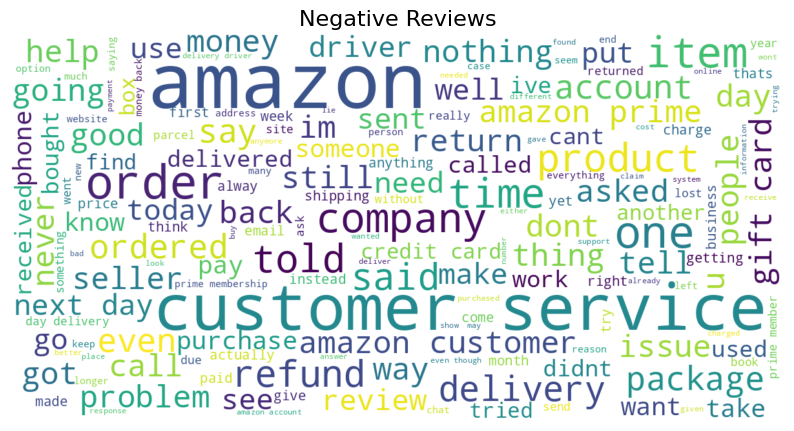

In [10]:
#task 2: EDA
!pip install -q wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title):
    wc = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(" ".join(data))

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Word clouds per sentiment
show_wordcloud(df[df['sentiment'] == 'positive']['clean_text'], 'Positive Reviews')
show_wordcloud(df[df['sentiment'] == 'neutral']['clean_text'], 'Neutral Reviews')
show_wordcloud(df[df['sentiment'] == 'negative']['clean_text'], 'Negative Reviews')


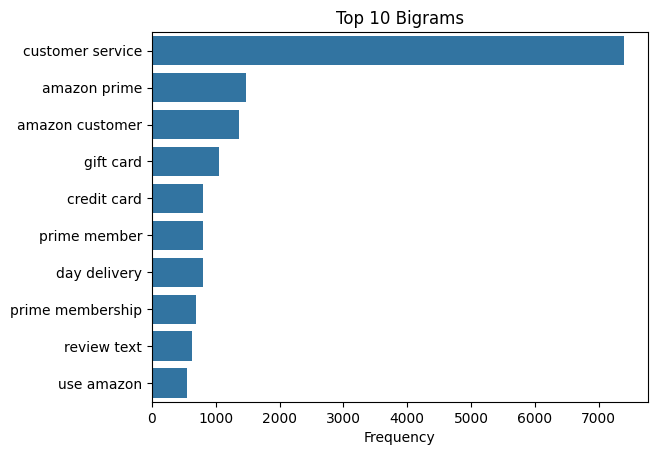

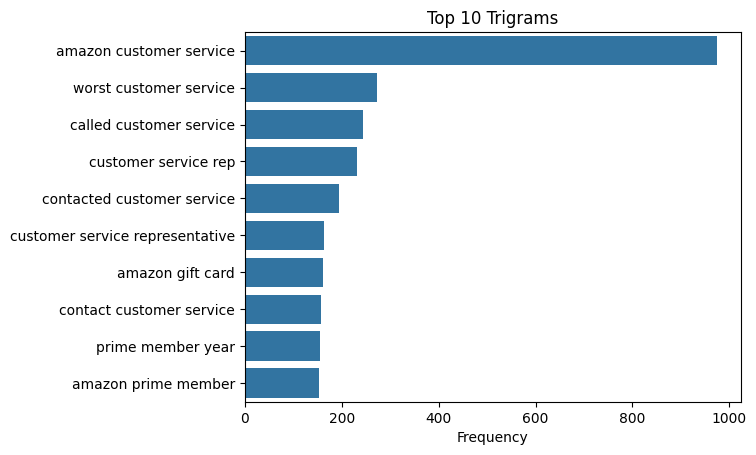

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_ngrams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top bigrams & trigrams
bigrams = get_top_ngrams(df['clean_text'], ngram_range=(2, 2), n=10)
trigrams = get_top_ngrams(df['clean_text'], ngram_range=(3, 3), n=10)

# Plot
def plot_ngrams(ngrams, title):
    x, y = zip(*ngrams)
    sns.barplot(x=y, y=x)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

plot_ngrams(bigrams, "Top 10 Bigrams")
plot_ngrams(trigrams, "Top 10 Trigrams")


/tmp/ipython-input-12-1800120224.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['Review Date'].dt.to_period('M')


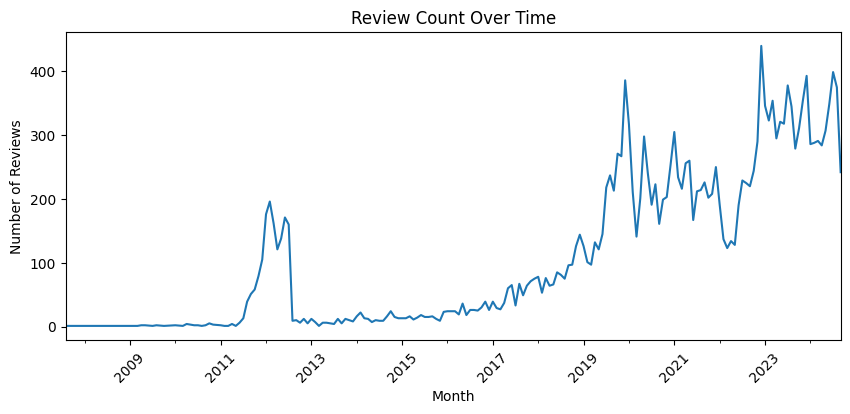

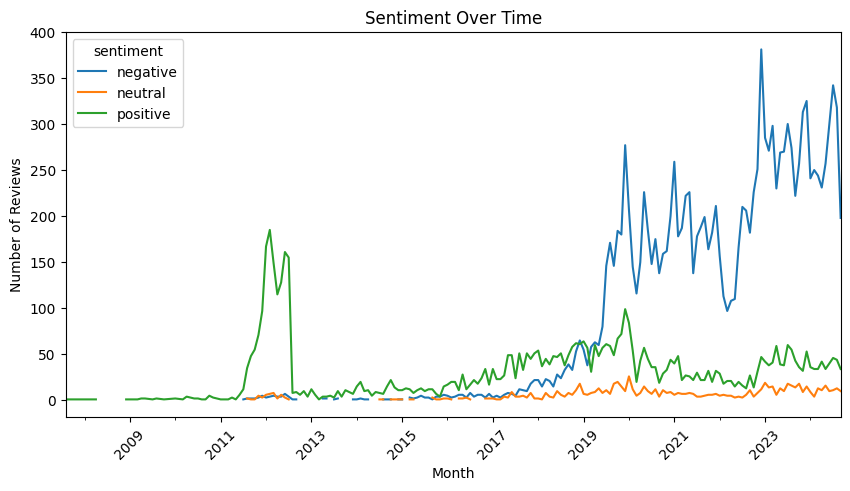

In [12]:
# Convert date column
df['Review Date'] = pd.to_datetime(df['Review Date'])  # adjust column name
df['year_month'] = df['Review Date'].dt.to_period('M')

# Plot review volume over time
df.groupby('year_month').size().plot(kind='line', title='Review Count Over Time', figsize=(10, 4))
plt.ylabel("Number of Reviews")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# Sentiment over time
df.groupby(['year_month', 'sentiment']).size().unstack().plot(kind='line', title='Sentiment Over Time', figsize=(10, 5))
plt.ylabel("Number of Reviews")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


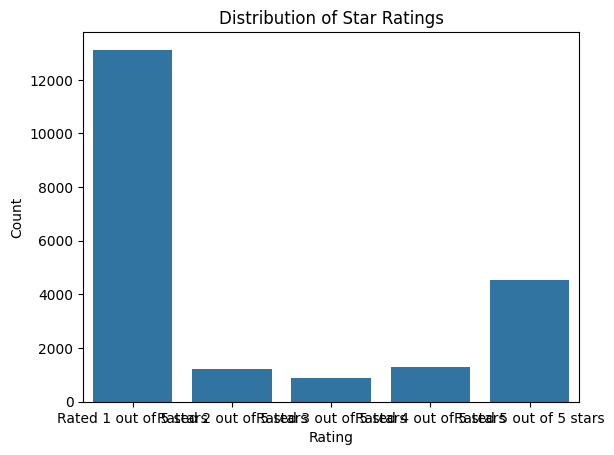

In [13]:
sns.countplot(data=df, x='rating', order=sorted(df['rating'].unique()))
plt.title("Distribution of Star Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Convert star ratings to sentiment (if not already done)
def rate_to_sentiment(r):
    # Extract the numerical rating from the string
    try:
        numeric_rating = int(r.split(' ')[1])
    except (ValueError, IndexError):
        return None # Handle cases where rating format is unexpected

    if numeric_rating <= 2:
        return 'negative'
    elif numeric_rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(rate_to_sentiment)

# Encode sentiment labels as numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment_label'] = le.fit_transform(df['sentiment'])  # 0: negative, 1: neutral, 2: positive

# Split data (use embeddings from BERT)
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, df['sentiment_label'], test_size=0.2, random_state=42, stratify=df['sentiment_label']
)

In [15]:
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
log_preds = log_clf.predict(X_test)

In [16]:
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)

In [17]:
def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name} Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


📊 Logistic Regression Classification Report:

              precision    recall  f1-score   support

    negative       0.91      0.95      0.93      2870
     neutral       0.67      0.01      0.02       177
    positive       0.82      0.86      0.84      1164

    accuracy                           0.89      4211
   macro avg       0.80      0.61      0.60      4211
weighted avg       0.88      0.89      0.87      4211



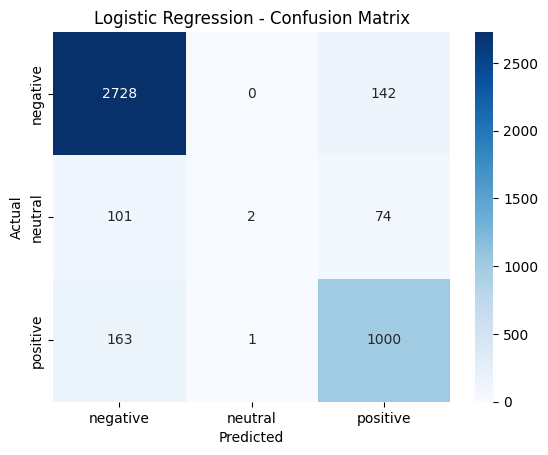

📊 SVM Classification Report:

              precision    recall  f1-score   support

    negative       0.91      0.96      0.93      2870
     neutral       0.00      0.00      0.00       177
    positive       0.84      0.87      0.85      1164

    accuracy                           0.89      4211
   macro avg       0.58      0.61      0.60      4211
weighted avg       0.85      0.89      0.87      4211



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


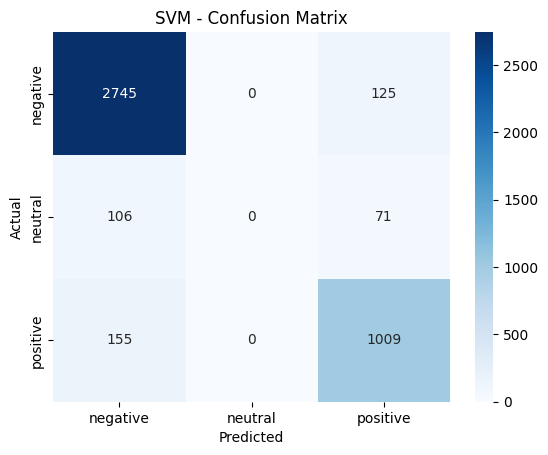

In [18]:
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("SVM", y_test, svm_preds)

In [19]:
!pip install -q bertopic
!pip install -q umap-learn hdbscan
df_topic = df[['clean_text', 'rating']].dropna().sample(n=5000, random_state=42)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.4 MB/s eta 0:00:00


In [20]:
from bertopic import BERTopic

# Create the model
topic_model = BERTopic(language="english", verbose=True)

# Fit the model on your clean review text
topics, probs = topic_model.fit_transform(df_topic['clean_text'].tolist())
# View top topics
topic_model.get_topic_info().head()

# View keywords in a specific topic
topic_model.get_topic(0)  # replace 0 with topic number
df_topic['topic'] = topics
df_topic['probability'] = probs


2025-07-18 05:20:34,946 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2025-07-18 05:23:02,217 - BERTopic - Embedding - Completed ✓
2025-07-18 05:23:02,218 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-18 05:23:42,275 - BERTopic - Dimensionality - Completed ✓
2025-07-18 05:23:42,276 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-18 05:23:42,513 - BERTopic - Cluster - Completed ✓
2025-07-18 05:23:42,518 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-18 05:23:42,757 - BERTopic - Representation - Completed ✓


In [21]:
def rating_group(r):
    # Extract the numerical rating from the string
    try:
        numeric_rating = int(r.split(' ')[1])
    except (ValueError, IndexError):
        return None # Handle cases where rating format is unexpected

    if numeric_rating <= 2:
        return "Low"
    elif numeric_rating >= 4:
        return "High"
    else:
        return "Neutral"

df_topic['rating_group'] = df_topic['rating'].apply(rating_group)

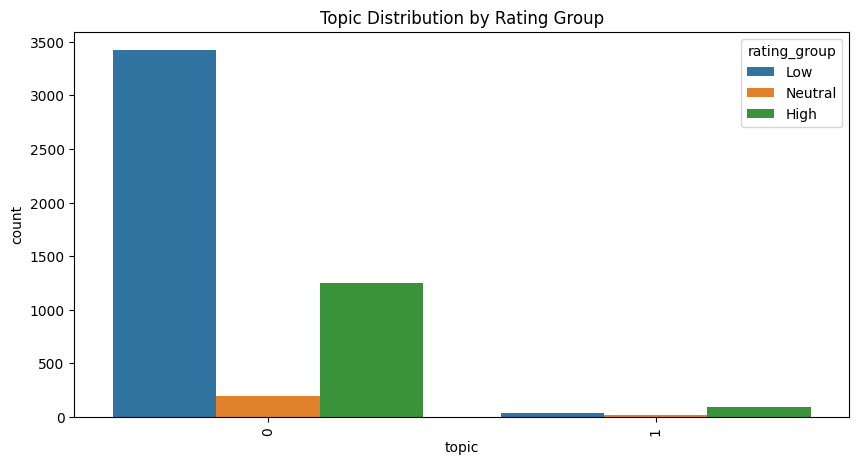

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df_topic[df_topic['topic'] >= 0], x='topic', hue='rating_group')
plt.title("Topic Distribution by Rating Group")
plt.xticks(rotation=90)
plt.show()

In [23]:
# Convert review date
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

# Drop missing dates
df = df.dropna(subset=['Review Date'])

# Convert rating to sentiment (if not already done)
def rating_to_sentiment(rating):
    # Extract the numerical rating from the string
    try:
        numeric_rating = int(rating.split(' ')[1])
    except (ValueError, IndexError):
        return None # Handle cases where rating format is unexpected

    if numeric_rating <= 2:
        return 'negative'
    elif numeric_rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)

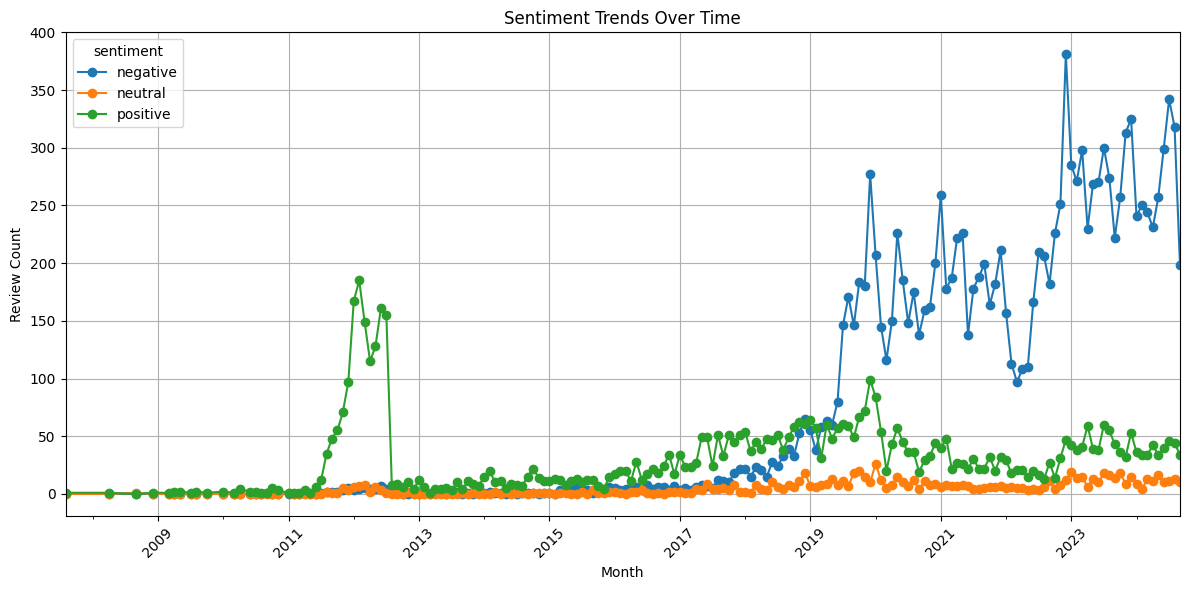

In [24]:
# Group by month and sentiment
df['year_month'] = df['Review Date'].dt.to_period('M')
monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)

# Plot
monthly_sentiment.plot(figsize=(12,6), marker='o')
plt.title("Sentiment Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


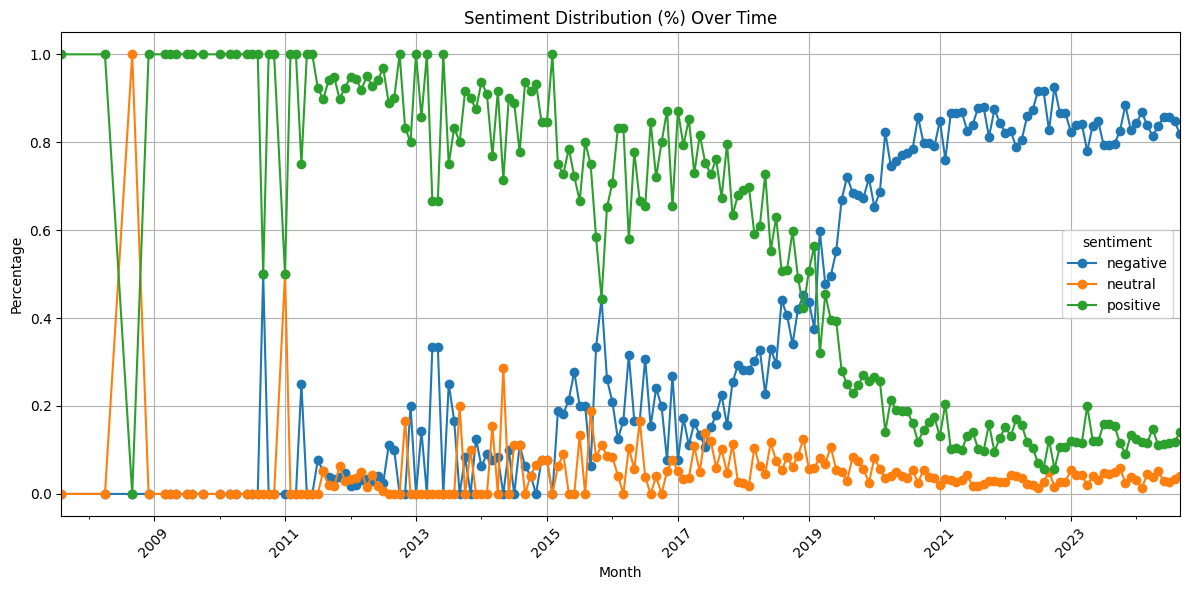

In [25]:
sentiment_percent = monthly_sentiment.divide(monthly_sentiment.sum(axis=1), axis=0)

sentiment_percent.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Sentiment Distribution (%) Over Time")
plt.ylabel("Percentage")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Find months with largest changes in negative sentiment
neg_counts = monthly_sentiment['negative']
neg_diff = neg_counts.diff()

# Print months with biggest spikes
spike_months = neg_diff.sort_values(ascending=False).head(5)
print("Top 5 spikes in negative sentiment:\n", spike_months)


Top 5 spikes in negative sentiment:
 year_month
2022-12    130.0
2019-12     97.0
2020-05     76.0
2019-07     66.0
2021-01     59.0
Freq: M, Name: negative, dtype: float64


In [27]:
!pip install -q spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

# Sample reviews to analyze
texts = df['clean_text'].dropna().sample(10, random_state=42).tolist()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
for i, review in enumerate(texts):
    doc = nlp(review)
    print(f"\n🔍 Review {i+1}:\n{review}")
    print("Named Entities:")
    for ent in doc.ents:
        print(f" - {ent.text} ({ent.label_})")


🔍 Review 1:
disgusting ordered expensive item amazon made sure prime item next day deliver promise receive item day later next day also charged twice upon speaking customer service team told made mistake sent parcel opposite direction address happens charged twice apparently ordered two cancelled one definitely case asked person spoke paying prime next day delivery response whatsoever fact actually rude paying always noticed item usually arent next day never think much usually little cheap thing child however item expensive needed literally next day poor poor service amazon recently really questioned using lately shame
Named Entities:
 - next day (DATE)
 - later next day (DATE)
 - two (CARDINAL)
 - one (CARDINAL)
 - next day (DATE)
 - next day (DATE)
 - next day (DATE)

🔍 Review 2:
charging item sent back numerous occasion awful driver leave parcel rain leave sorry missed slip letterbox people see parcel abysmal customer service might well replace robot theyd personalityonly plus poin

In [29]:
from collections import defaultdict

entity_counts = defaultdict(int)
all_entities = []

for doc in nlp.pipe(df['clean_text'].dropna().tolist(), batch_size=100, disable=["tagger", "parser"]):
    for ent in doc.ents:
        entity_counts[ent.label_] += 1
        all_entities.append((ent.text, ent.label_))

# Show top 10 most common entity types
sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)[:10]


[('DATE', 13391),
 ('CARDINAL', 5691),
 ('ORG', 3058),
 ('ORDINAL', 2549),
 ('PERSON', 2514),
 ('TIME', 2107),
 ('GPE', 1374),
 ('NORP', 1004),
 ('LANGUAGE', 338),
 ('MONEY', 233)]

In [30]:
import pandas as pd
entity_df = pd.DataFrame(all_entities, columns=['entity', 'label'])

# Top entities by type
for label in ['ORG', 'PRODUCT', 'GPE']:
    print(f"\nop entities for: {label}")
    print(entity_df[entity_df['label'] == label]['entity'].value_counts().head(10))


🔖 Top entities for: ORG
entity
amazon             723
amazoncom          191
amazon customer    164
fed                 96
google              34
samsung             27
dpd                 25
cctv                24
xbox                21
un                  20
Name: count, dtype: int64

🔖 Top entities for: PRODUCT
entity
google               19
jan                   2
jimmy                 2
memember              1
last miss             1
log locker            1
courier minute        1
multipart             1
amazon least four     1
year mile             1
Name: count, dtype: int64

🔖 Top entities for: GPE
entity
china         241
india         168
uk             99
america        52
canada         42
australia      30
germany        30
california     29
france         26
netflix        21
Name: count, dtype: int64


In [31]:
# Group by sentiment and topic
topic_sentiment_counts = df_topic.groupby(['rating_group', 'topic']).size().unstack(fill_value=0)

# Calculate sentiment ratio per topic
topic_sentiment_ratio = topic_sentiment_counts.divide(topic_sentiment_counts.sum(axis=0), axis=1)

# View top topics with highest positive sentiment
top_positive_topics = topic_sentiment_ratio.loc['High'].sort_values(ascending=False).head(5)
top_negative_topics = topic_sentiment_ratio.loc['Low'].sort_values(ascending=False).head(5)

In [32]:
print(" Most Loved Features:\n")
for topic in top_positive_topics.index:
    print(f"Topic {topic}: {topic_model.get_topic(topic)}\n")

print("\n💢 Most Criticized Features:\n")
for topic in top_negative_topics.index:
    print(f"Topic {topic}: {topic_model.get_topic(topic)}\n")


 Most Loved Features:

Topic 1: [('text', np.float64(2.0903214472400076)), ('found', np.float64(1.9235945734571147)), ('review', np.float64(1.5761379825143804)), ('helpno', np.float64(0.027020774609801016)), ('several', np.float64(0.014622734189330638)), ('done', np.float64(0.014309941524576824)), ('called', np.float64(0.012793245699832298)), ('find', np.float64(0.012670505936302427)), ('help', np.float64(0.012587340091848764)), ('cant', np.float64(0.011985678511105338))]

Topic 0: [('amazon', np.float64(0.09437398503467521)), ('customer', np.float64(0.0509672516926088)), ('service', np.float64(0.04896661925234376)), ('item', np.float64(0.04481508836071529)), ('delivery', np.float64(0.039051261397538416)), ('day', np.float64(0.037673801191252)), ('time', np.float64(0.03741583288458317)), ('order', np.float64(0.03657942898491091)), ('get', np.float64(0.035793443505506305)), ('prime', np.float64(0.02842849246444102))]


💢 Most Criticized Features:

Topic 0: [('amazon', np.float64(0.09437

Improve logistics partnerships or warehouse management to reduce delays.
Get better HR who can handle customer service more efficiently.


In [33]:
!pip install seaborn plotly streamlit --quiet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


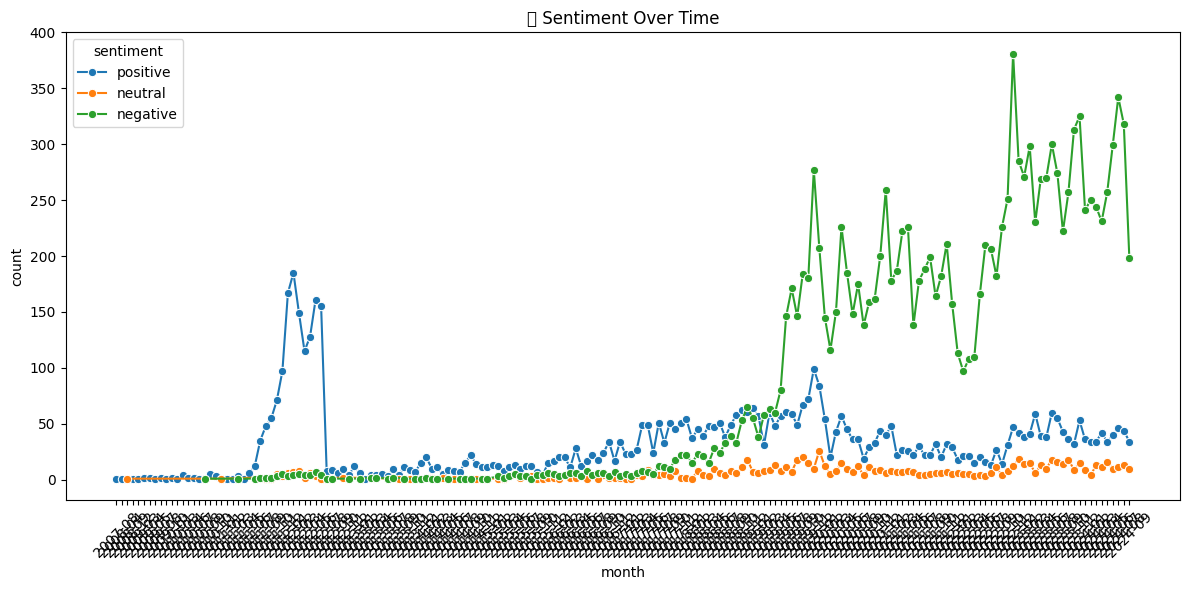

In [34]:
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
df['month'] = df['Review Date'].dt.to_period('M').astype(str)

sentiment_trend = df.groupby(['month', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=sentiment_trend, x='month', y='count', hue='sentiment', marker='o')
plt.xticks(rotation=45)
plt.title("Sentiment Over Time")
plt.tight_layout()
plt.show()


In [35]:
fig = px.line(sentiment_trend, x='month', y='count', color='sentiment',
              title='📈 Sentiment Trend Over Time', markers=True)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


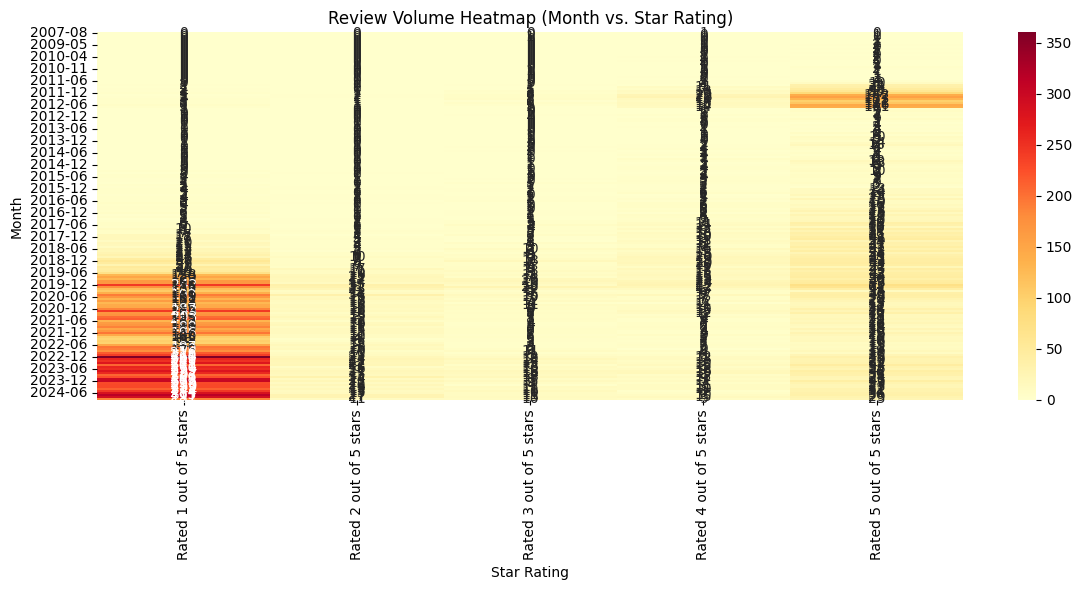

In [36]:
df['month'] = pd.to_datetime(df['Review Date']).dt.to_period('M').astype(str)
heatmap_data = df.pivot_table(index='month', columns='rating', values='clean_text', aggfunc='count').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title("Review Volume Heatmap (Month vs. Star Rating)")
plt.ylabel("Month")
plt.xlabel("Star Rating")
plt.tight_layout()
plt.show()


In [41]:
from google.colab import files
uploaded = files.upload()

list(uploaded.keys())

import nbformat

def clean_metadata(path):
    with open(path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)

    if 'widgets' in nb.get('metadata', {}):
        del nb['metadata']['widgets']
        print("✅ Removed 'widgets' from notebook metadata.")

    else:
        print(" No 'widgets' metadata found.")

    with open(path, 'w', encoding='utf-8') as f:
        nbformat.write(nb, f)

# Make sure this filename matches exactly!
clean_metadata("NLP_Sentiment_Analysis.ipynb")



Saving NLP_Sentiment_Analysis.ipynb to NLP_Sentiment_Analysis (3).ipynb
✅ Removed 'widgets' from notebook metadata.
